**Import Libraries**

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [47]:
star_df = pd.read_csv('/content/star_classification.csv')
star_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
star_df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [56]:
star_df.dropna(inplace=True)

**Drop Unwanted Columns**

In [57]:
star_df = star_df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','class','redshift']]
star_df.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


**EDA**

In [58]:
galaxy = star_df[star_df['class']=='GALAXY']
star = star_df[star_df['class']=='STAR']
qso = star_df[star_df['class']=='QSO']

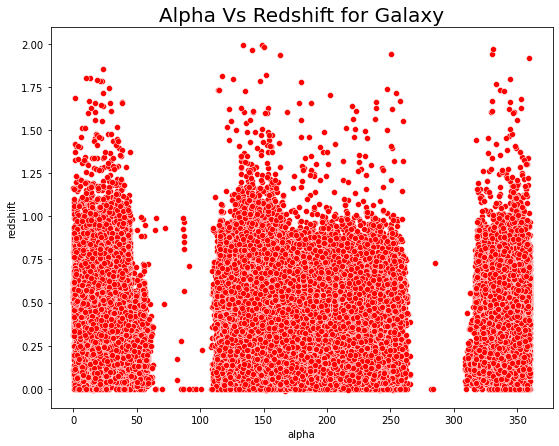

In [59]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=galaxy,color='r');
plt.title("Alpha Vs Redshift for Galaxy",{'fontsize':20});

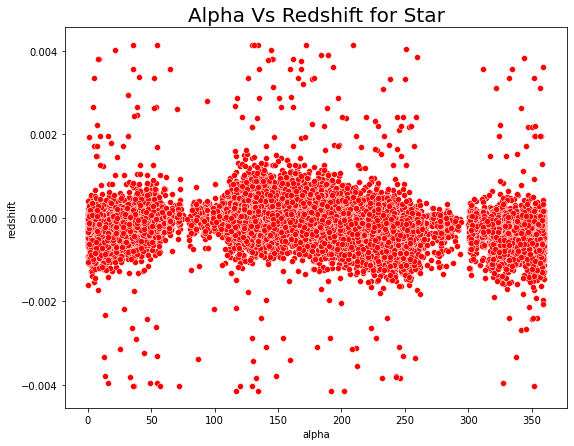

In [60]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=star,color='r');
plt.title("Alpha Vs Redshift for Star",{'fontsize':20});

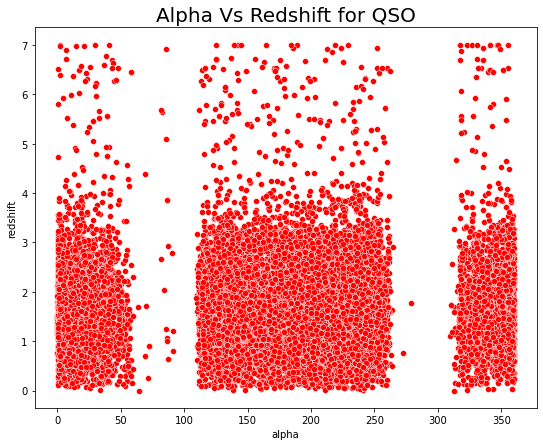

In [61]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=qso,color='r');
plt.title("Alpha Vs Redshift for QSO",{'fontsize':20});

In [62]:
star_df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')

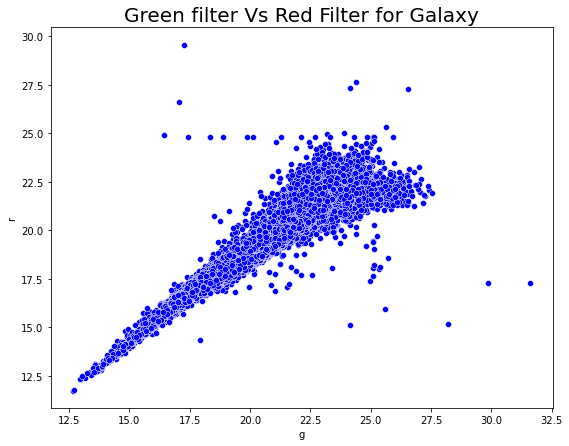

In [63]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=galaxy,color='b');
plt.title("Green filter Vs Red Filter for Galaxy",{'fontsize':20});

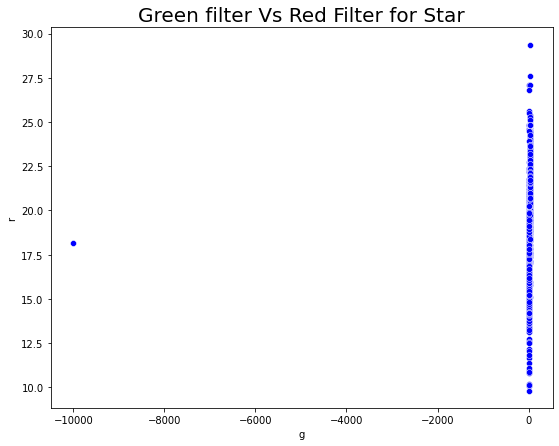

In [64]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=star,color='b');
plt.title("Green filter Vs Red Filter for Star",{'fontsize':20});

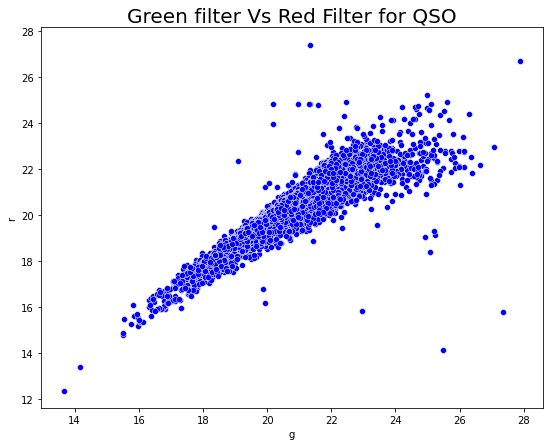

In [65]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=qso,color='b');
plt.title("Green filter Vs Red Filter for QSO",{'fontsize':20});

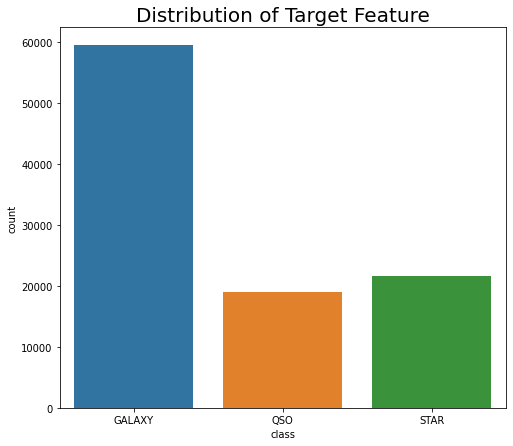

In [66]:
plt.figure(figsize=(8,7))
sns.countplot(star_df['class']);
plt.title("Distribution of Target Feature",{'fontsize':20});

**Data Spliting**

In [67]:
X = star_df.drop('class',axis=1)
y = star_df['class']

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y[20:]

array([0, 2, 0, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

**Data Scaling**

In [70]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

**Model Building**

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = {
    KNeighborsClassifier(n_neighbors=3):'K-Neighbors Classifier',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest Classifier',
    GaussianNB():'Naive Bayers',
    LinearRegression():'Linear Regression',
    LogisticRegression():'LogisticRegression',
    DecisionTreeClassifier():'Decision Tree',
    GradientBoostingClassifier():'GradientBoostingClassifier'

}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",(model.score(X_test,y_test))*100,"%")

Accuracy Score for K-Neighbors Classifier is :  94.23 %
Accuracy Score for Support Vector Machine is :  96.03 %
Accuracy Score for Random Forest Classifier is :  97.89999999999999 %
Accuracy Score for Naive Bayers is :  74.44 %
Accuracy Score for Linear Regression is :  23.298494198231843 %
Accuracy Score for LogisticRegression is :  95.525 %
Accuracy Score for Decision Tree is :  96.485 %
Accuracy Score for GradientBoostingClassifier is :  97.71 %


**Model Evaluation**

In [72]:
from sklearn.metrics import classification_report
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for : {name}")
    print(classification_report(y_test,y_pred))

Classification Report for : K-Neighbors Classifier
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11879
           1       0.95      0.90      0.92      3782
           2       0.93      0.94      0.93      4339

    accuracy                           0.94     20000
   macro avg       0.94      0.93      0.94     20000
weighted avg       0.94      0.94      0.94     20000

Classification Report for : Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11879
           1       0.96      0.90      0.93      3782
           2       0.94      1.00      0.97      4339

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000

Classification Report for : Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98     

**Model is deployed on Cluzters.ai (https://www.cluzters.ai/Model/2632/star-classification)**